## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# View Mouse Data Header
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# View Study Results Data Header
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df = pd.DataFrame(combined_mouse_study_df)

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
number_mice = combined_df['Mouse ID'].value_counts()
number_mice

g989    13
w575    10
o562    10
c832    10
c302    10
        ..
n482     1
h428     1
u153     1
x336     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dup_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dropped_dup_mice_df = combined_df[combined_df["Mouse ID"] == 'g989']
dropped_dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dup_mice_df = combined_df[combined_df["Mouse ID"] != 'g989']
dropped_dup_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num = dropped_dup_mice_df["Mouse ID"].value_counts()
cleaned_mice_num

p438    10
o287    10
c302    10
a492    10
g791    10
        ..
n482     1
h428     1
x336     1
u153     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
group_regimen = dropped_dup_mice_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
g_regimen_mean = group_regimen["Tumor Volume (mm3)"].mean()
g_regimen_median = group_regimen["Tumor Volume (mm3)"].median()
g_regimen_var = group_regimen["Tumor Volume (mm3)"].var()
g_regimen_std = group_regimen["Tumor Volume (mm3)"].std()
g_regimen_sem = group_regimen["Tumor Volume (mm3)"].sem()
g_regimen_mean



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
stats_summary = pd.DataFrame({"Mean": g_regimen_mean, "Median": g_regimen_median, "Variance": g_regimen_var,
                              "Standard Deviation": g_regimen_std, "SEM": g_regimen_sem})
stats_summary                           

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_agg = dropped_dup_mice_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])\
["Tumor Volume (mm3)"]

stats_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

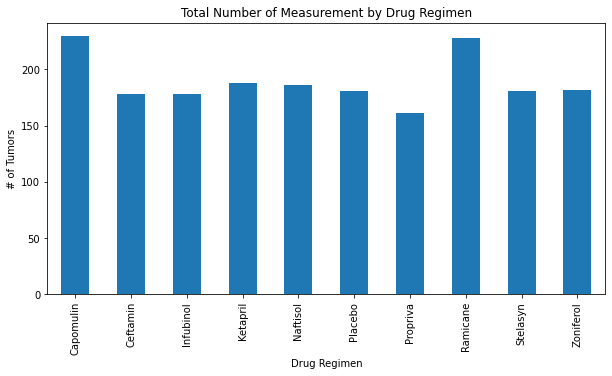

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_pandas = combined_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
bar_pandas.plot(kind="bar", figsize=(10,5))

# Format Bar Graph
plt.title("Total Number of Measurement by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Tumors")

plt.show

Text(0, 0.5, '# of Tumors')

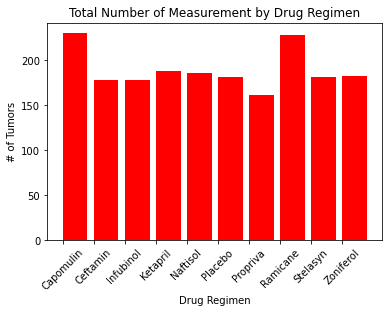

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(bar_pandas.index, bar_pandas, color="r", align="edge")
plt.xticks(rotation = 45)

# Format Bar Graph
plt.title("Total Number of Measurement by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Tumors")

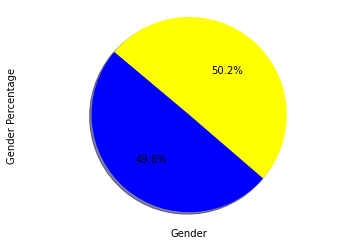

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_gender = mouse_metadata.groupby("Sex").count()
gender_label = ["Female", "Male"]
gender_num = (pie_gender["Mouse ID"])
colors = ["blue", "yellow"]
#plt.title = ("Female versus Male Distribution")
plt.xlabel("Gender")
plt.ylabel("Gender Percentage")
plt.pie(gender_num, labels=gender_label, colors=colors, labeldistance = None, autopct="%1.1f%%", shadow=True,
        startangle=140)
plt.axis("equal")
#plt.title('Female versus Male Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

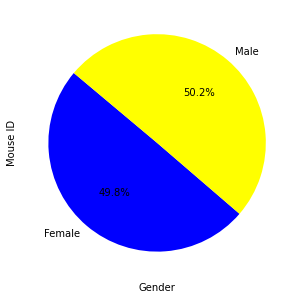

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_gender = mouse_metadata.groupby("Sex").count()
colors = ["blue", "yellow"]
#plt.title("Female vs. Male Distribution")
plt.xlabel("Gender")
plt.ylabel("Gender Percentage")
pie_gender["Mouse ID"].plot.pie(y='sizes', figsize=(5,5), autopct="%1.1f%%", startangle=140,
colors=colors)
plt.show

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugregimen = ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin']
drug_values = []

combined_df

for drug in drugregimen:
    drug_values.append(combined_df[combined_df["Drug Regimen"] == drug], "Tumor Volume (mm3)")
drug_values    
#drugregimen

TypeError: append() takes exactly one argument (2 given)

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_mouseid_df = dropped_dup_mice_df.groupby(["Mouse ID"])
max_timepoint_df = groupby_mouseid_df["Timepoint"].max().to_frame()
max_timepoint_df.reset_index(inplace = True)
#max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_tumor_vol_df = pd.merge(dropped_dup_mice_df, max_timepoint_df)
max_timepoint_tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol = max_timepoint_tumor_vol_df.loc[max_timepoint_tumor_vol_df["Drug Regimen"] == treatments, "Tumor Volume (mm3)"]    
#tumor_vol = max_timepoint_tumor_vol_df.loc[max_timepoint_tumor_vol_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]     

# add subset 
tumor_vol_data.append(tumor_vol)
    
# Determine outliers using upper and lower bounds
quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])

treatment, outliers
    

ValueError: ('Lengths must match to compare', (248,), (4,))

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
